# IMPORTING LIBRARIES AND DATABASE

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation

In [3]:
# Import the CSV file
df = pd.read_csv('./fish/bangus.csv', index_col='Date', parse_dates=True)

# Display all rows when printing
pd.set_option('display.max_rows', None)
print('Shape: ', df.shape)
df

Shape:  (101, 3)


,High,Low,Commodity
Date,,,
2024-01-04,200,170,Bangus
2024-01-09,220,180,Bangus
2024-01-10,260,160,Bangus
2024-01-11,260,140,Bangus
2024-01-12,260,160,Bangus
2024-01-15,260,160,Bangus
2024-01-16,260,160,Bangus
2024-01-17,250,170,Bangus
2024-01-18,220,150,Bangus


<Axes: xlabel='Date'>

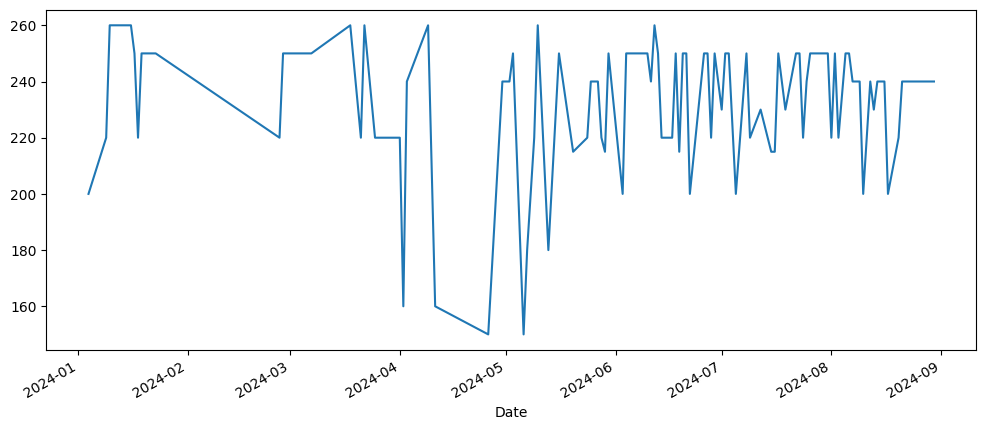

In [4]:
# Plot the values of the prices
df['High'].plot(figsize=(12,5))

# ACQUIRING THE VALUES FOR P, D, Q FOR ARIMA MODEL

In [5]:
# ADF (Augmented Dickey Fuller): Check for Stationarity
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('1. ADF:', dftest[0])
    print('2. P-Value:', dftest[1])
    print('3. No. of Lags:', dftest[2])
    print('4. No. of Observations:', dftest[3])
    print('5. Critical Values:')
    for key, val in dftest[4].items():
        print('\t', key, ':', val) 

# Check for Stationarity
ad_test(df['High'])

1. ADF: -2.383858796651087
2. P-Value: 0.1463440644349852
3. No. of Lags: 5
4. No. of Observations: 95
5. Critical Values:
	 1% : -3.5011373281819504
	 5% : -2.8924800524857854
	 10% : -2.5832749307479226


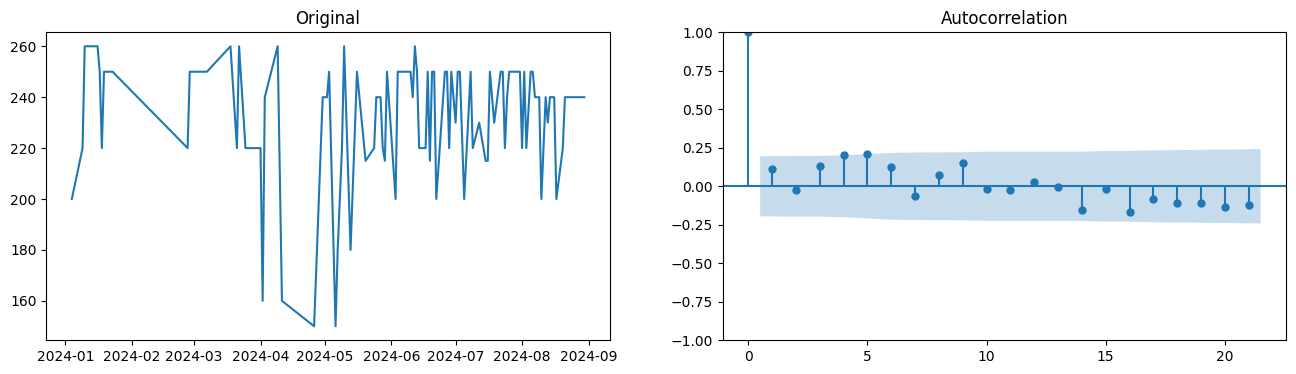

In [6]:
# ACF: Autocorrelation Function: Compute for p,d,f
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df['High'])
ax1.set_title('Original')
plot_acf(df['High'], ax=ax2);

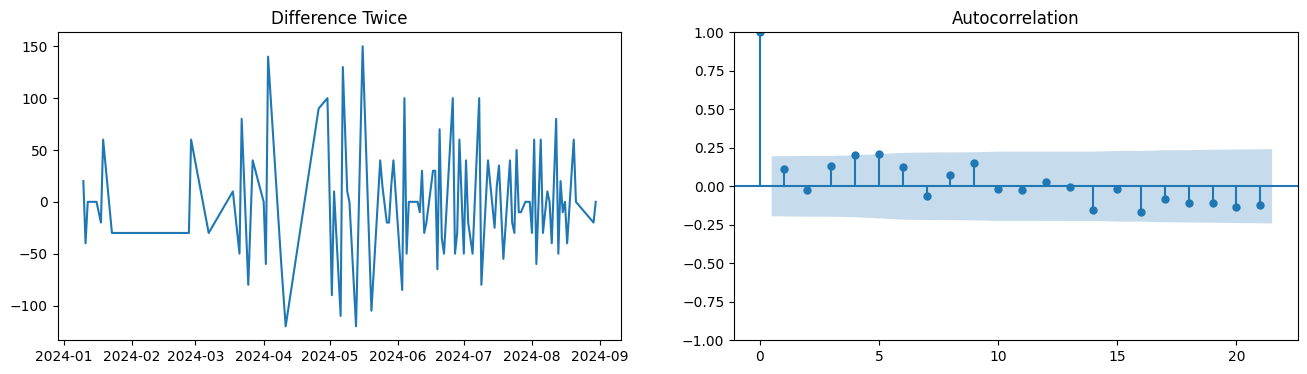

In [7]:
# ACF
diff = df['High'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_acf(df['High'], ax=ax2);

In [8]:
from pmdarima.arima.utils import ndiffs

In [9]:
# Computing for the value of 'd' in ARIMA model
print(f'D-value:', ndiffs(df['High'], test='adf'))

D-value: 1


In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

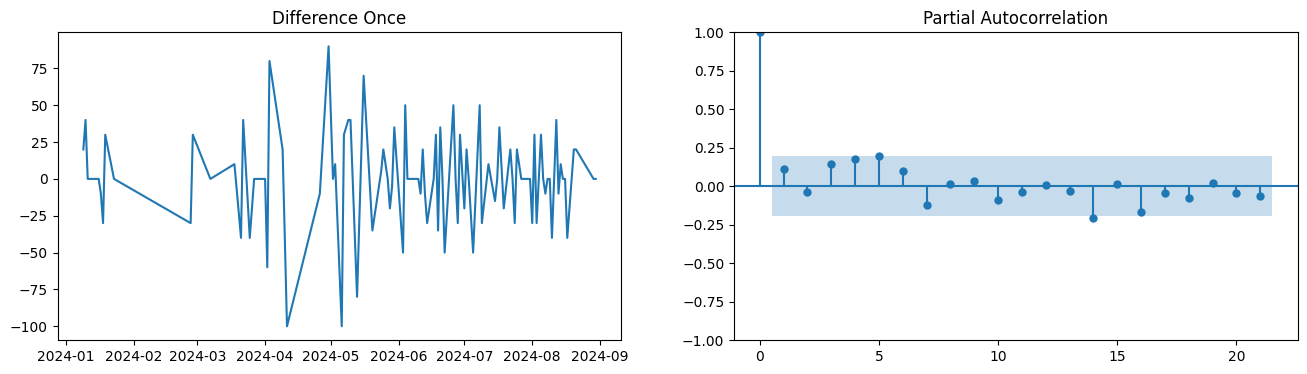

In [11]:
# P-VALUE: PACF
diff = df['High'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0, 1)
plot_pacf(df['High'], ax=ax2);

# P-value: Get the x-value in 'Partial Autocorrelation' plot that exceeds just above the limit of the significance line (in this case, 5)

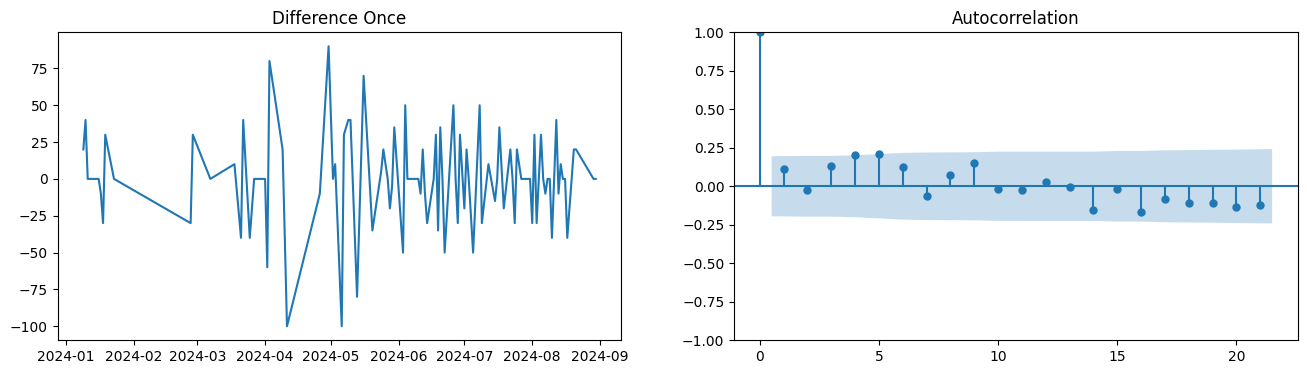

In [12]:
# Q-VALUE
diff = df['High'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0, 1)
plot_acf(df['High'], ax=ax2);

# Q-value: Get the x-value in 'Partial Autocorrelation' plot that exceeds just above the limit of the significance line (in this case, either 4 or 5)

# TRAIN-TEST: CREATING THE ARIMA MODEL

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
# Split Data into Training Set and Testing Set using Scikit
from sklearn.model_selection import train_test_split

# Set the index column to 'Date' column
# if df['Date']:
#     df = df.set_index('Date')

# Store the dataframe in a separate variable
X = df

# Split the dataset into training (X_train) and testing (X_test) sets
X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)

print(f'Training Set: {X_train.shape} \n Testing Set: {X_test.shape}')

Training Set: (80, 3) 
 Testing Set: (21, 3)


In [15]:
# Train the ARIMA model with the high prices of the training set
# Use the values obntained from the acf and pacf test (p=5, d=1, q=5)
model = ARIMA(X_train['High'], order=(5,1,5))
# model = ARIMA(X_train['High'], order=(5,1,5))
model = model.fit()
model.summary()

D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programs\Py

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                   80
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -363.911
Date:                Fri, 13 Sep 2024   AIC                            749.821
Time:                        15:39:10   BIC                            775.885
Sample:                             0   HQIC                           760.263
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4438      0.202     -2.202      0.028      -0.839      -0.049
ar.L2         -0.0296      0.197     -0.151      0.880      -0.415       0.356
ar.L3         -0.2114      0.180     -1.177      0.239      -0.564       0.141
ar.L4         -0.4750      0.193     -2.465      0.014      -0.853      -0.097
ar.L5          0.2517      0.153      1.642      0.101      -0.049       0.552
ma.L1         -0.4928      1.806     -0.273      0.785      -4.032       3.047
ma.L2         -0.4912      1.748     -0.281      0.779      -3.916       2.934
ma.L3          0.5198      3.259      0.160      0.873      -5.867       6.906
ma.L4          0.4994      0.493      1.012      0.311      -0.467       1.466
ma.L5         -0.9565      2.874     -0.333      0.739      -6.590       4.677
sigma2       537.0831   1562.590      0.344      0.731   -2525.536    3599.702
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.18
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               0.33   Skew:                            -0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start = len(X_test)
end = len(X_train) + len(X_test) - 1
predict = model.predict(start=start, end=end, typ='levels')
predict.index = df.index[start:end+1]
print(predict)

Date
2024-04-03    222.394145
2024-04-09    239.792229
2024-04-11    212.019891
2024-04-26    211.664329
2024-04-30    236.470144
2024-05-02    232.753647
2024-05-03    215.543380
2024-05-06    202.932327
2024-05-07    214.266335
2024-05-09    248.878739
2024-05-10    234.208843
2024-05-13    215.332693
2024-05-16    186.147586
2024-05-20    217.320263
2024-05-24    226.972212
2024-05-25    246.499560
2024-05-27    253.064550
2024-05-28    220.653420
2024-05-29    215.921758
2024-05-30    207.157885
2024-06-03    223.143552
2024-06-04    232.125447
2024-06-05    243.043770
2024-06-06    239.567997
2024-06-07    222.149588
2024-06-08    228.188997
2024-06-10    230.514293
2024-06-11    242.142723
2024-06-12    250.464172
2024-06-13    242.737343
2024-06-14    236.383223
2024-06-17    224.184403
2024-06-18    231.358162
2024-06-19    232.867869
2024-06-20    223.888298
2024-06-21    240.062581
2024-06-22    228.567852
2024-06-26    234.618064
2024-06-27    244.839626
2024-06-28    224.64

D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

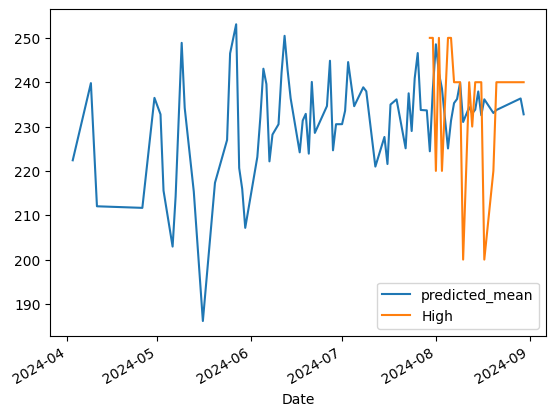

In [19]:
# Plot the predicted values, and the actual values from the Test set
predict.plot(legend=True)
X_test['High'].plot(legend=True)

# FULL DATASET: TRAIN THE ARIMA MODEL

In [20]:
# Re-train the model on the entire dataset, then predict future prices
model2 = ARIMA(df['High'], order=(5,1,5))
model2 = model2.fit()
df.tail()

D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Programs\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programs\Py

,High,Low,Commodity
Date,,,
2024-08-17,200,140,Bangus
2024-08-20,220,170,Bangus
2024-08-21,240,230,Bangus
2024-08-29,240,135,Bangus
2024-08-30,240,135,Bangus


In [21]:
# For Future Dates
index_future_dates = pd.date_range(start='30 08 2024', end='30 11 2024')
# Checking: Print index of Future Dates
# print(index_future_dates)

# Combine historical data dates (df.index) with future dates
# combined_index = df.index.union(index_future_dates)
# print(combined_index)

# Run the prediction
predict = model2.predict(start=1, end=len(df)-8, typ='levels').rename('ARIMA')

# Transform predict from Series to DataFrame
predict_df = pd.DataFrame(predict)

# Reset the index to turn it into a column
predict_df = predict_df.reset_index(drop=True)

# Add the future dates as a new column 'Index'
predict_df['Index'] = index_future_dates

# Create a series of NaN values for the historical data
# nan_series = pd.Series([np.nan] * len(df), index=df.index)

# Concatenate the NaN series with the future predictions
# predict_with_nan = pd.concat([nan_series, predict])

# Display the values of the prediction
print(predict_df)

         ARIMA      Index
0   199.903836 2024-08-30
1   211.075275 2024-08-31
2   227.412513 2024-09-01
3   229.881883 2024-09-02
4   236.155203 2024-09-03
5   241.738035 2024-09-04
6   253.578472 2024-09-05
7   255.175736 2024-09-06
8   250.463529 2024-09-07
9   247.283516 2024-09-08
10  237.932007 2024-09-09
11  235.752265 2024-09-10
12  244.364418 2024-09-11
13  246.831250 2024-09-12
14  250.921243 2024-09-13
15  242.416868 2024-09-14
16  245.484918 2024-09-15
17  236.740077 2024-09-16
18  237.983575 2024-09-17
19  241.192293 2024-09-18
20  223.441386 2024-09-19
21  237.290294 2024-09-20
22  213.304008 2024-09-21
23  212.850064 2024-09-22
24  216.873795 2024-09-23
25  223.435727 2024-09-24
26  216.549100 2024-09-25
27  206.925469 2024-09-26
28  207.421219 2024-09-27
29  213.314116 2024-09-28
30  224.969233 2024-09-29
31  207.182121 2024-09-30
32  204.147173 2024-10-01
33  206.953486 2024-10-02
34  217.056292 2024-10-03
35  223.732158 2024-10-04
36  234.029294 2024-10-05
37  218.6968

In [22]:
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

(array([19723., 19754., 19783., 19814., 19844., 19875., 19905., 19936.,
        19967., 19997., 20028., 20058.]),
 [Text(19723.0, 0, '2024-01'),
  Text(19754.0, 0, '2024-02'),
  Text(19783.0, 0, '2024-03'),
  Text(19814.0, 0, '2024-04'),
  Text(19844.0, 0, '2024-05'),
  Text(19875.0, 0, '2024-06'),
  Text(19905.0, 0, '2024-07'),
  Text(19936.0, 0, '2024-08'),
  Text(19967.0, 0, '2024-09'),
  Text(19997.0, 0, '2024-10'),
  Text(20028.0, 0, '2024-11'),
  Text(20058.0, 0, '2024-12')])

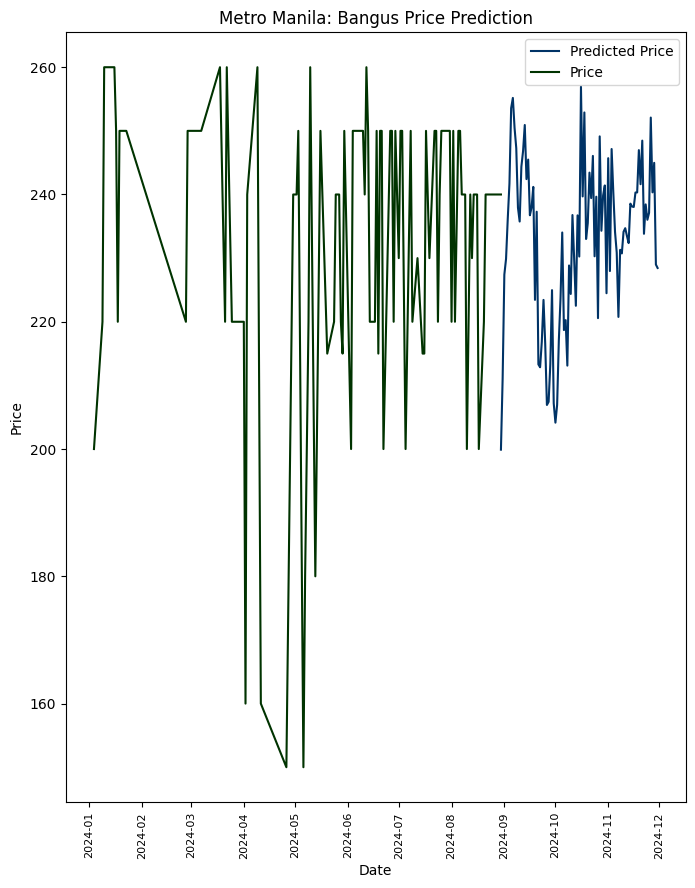

In [23]:
# Set the figure size of the plot
fig, ax = plt.subplots(figsize=(8,10))

# Create the Line Plot
sns.lineplot(data=predict_df, x=predict_df['Index'], y=predict_df['ARIMA'], color='#003366', label='Predicted Price')
sns.lineplot(data=df, x=df['Date'], y=df['High'], color='#003300', label='Price')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Metro Manila: Bangus Price Prediction')

# Add a legend
plt.legend()

# Set x-ticks to correspond to Barangay names
plt.xticks(fontsize=8, rotation=90)

# PRINT THE PREDICTED PRICES FOR THE NEXT 7 DAYS

In [30]:
# Given timestamp
start_date = last_row = df['Date'].iloc[-1]

# End date, which is 7 days after the start date
end_date = start_date + pd.Timedelta(days=7)

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

print(f'Date Today: {start_date}\nPredicted Prices for next week:')

predict_14 = pd.DataFrame()
predict_14_price = []
predict_14_days = []
for day in range(7):
    filtered_df = predict_df[predict_df['Index'] == date_range[day+1]]
    predict_14_price.append(filtered_df['ARIMA'].values[0])
    predict_14_days.append(date_range[day+1])

    # Get the value from the 'ARIMA' column for that row
    # price = filtered_df['ARIMA'].values[0] if not filtered_df.empty else None

    # print(f'{date_range[day+1]}: {price}')
    
predict_14['Prediction'] = predict_14_price
predict_14['Date'] = predict_14_days

predict_14

Date Today: 2024-08-30 00:00:00
Predicted Prices for next week:


,Prediction,Date
0,211.075275,2024-08-31
1,227.412513,2024-09-01
2,229.881883,2024-09-02
3,236.155203,2024-09-03
4,241.738035,2024-09-04
5,253.578472,2024-09-05
6,255.175736,2024-09-06


<h1>aken to</h1>

In [31]:
filtered_df

,ARIMA,Index
7,255.175736,2024-09-06


In [32]:
last_14_days = df.tail(20)
last_14_days = last_14_days.reset_index()
last_14_days

,index,Date,High,Low,Commodity
0,81,2024-07-31,250,135,Bangus
1,82,2024-08-01,220,170,Bangus
2,83,2024-08-02,250,130,Bangus
3,84,2024-08-03,220,170,Bangus
4,85,2024-08-05,250,140,Bangus
5,86,2024-08-06,250,135,Bangus
6,87,2024-08-07,240,135,Bangus
7,88,2024-08-08,240,130,Bangus
8,89,2024-08-09,240,135,Bangus
9,90,2024-08-10,200,170,Bangus


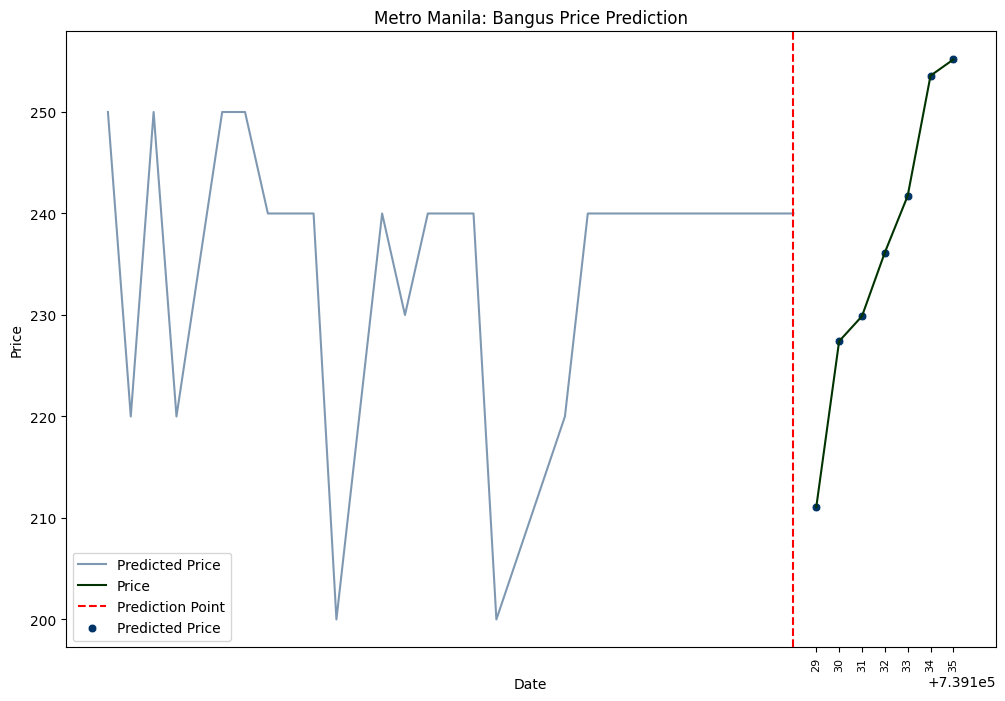

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predict_14['Date'] and last_14_days['Date'] are already in numeric or datetime format

# Set the figure size of the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Ensure that 'Date' columns are in numeric format for polynomial fitting
# If 'Date' is in datetime format, you need to convert it to ordinal numbers
predict_14['Date'] = pd.to_datetime(predict_14['Date']).map(pd.Timestamp.toordinal)
last_14_days['Date'] = pd.to_datetime(last_14_days['Date']).map(pd.Timestamp.toordinal)

# Create the Line Plot: Curved
sns.lineplot(x=last_14_days['Date'], y=last_14_days['High'], color='#003366', label='Predicted Price', alpha=0.5)
sns.lineplot(x=predict_14['Date'], y=predict_14['Prediction'], color='#003300', label='Price')

# Add vertical line at the last date of 'last_14_days'
plt.axvline(last_14_days['Date'].iloc[-1], color="red", linestyle='--', label="Prediction Point")

# Scatter plot for predicted values
sns.scatterplot(data=predict_14, x=predict_14['Date'], y=predict_14['Prediction'], color='#003366', label='Predicted Price', s=40)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Metro Manila: Bangus Price Prediction')

# Add a legend
plt.legend()

# Set x-ticks to correspond to Date
plt.xticks(predict_14['Date'], fontsize=8, rotation=90)

# Show the plot
plt.show()


C:\Users\sheila brown\AppData\Local\Temp\ipykernel_19144\2826429916.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(predict_14['Date'], predict_14['Prediction'], 3)
C:\Users\sheila brown\AppData\Local\Temp\ipykernel_19144\2826429916.py:17: RankWarning: Polyfit may be poorly conditioned
  coefficients1 = np.polyfit(last_14_days['Date'], last_14_days['High'], 3)


(array([739095., 739100., 739105., 739110., 739115., 739120., 739125.,
        739130., 739135., 739140.]),
 [Text(739095.0, 0, '−5'),
  Text(739100.0, 0, '0'),
  Text(739105.0, 0, '5'),
  Text(739110.0, 0, '10'),
  Text(739115.0, 0, '15'),
  Text(739120.0, 0, '20'),
  Text(739125.0, 0, '25'),
  Text(739130.0, 0, '30'),
  Text(739135.0, 0, '35'),
  Text(739140.0, 0, '40')])

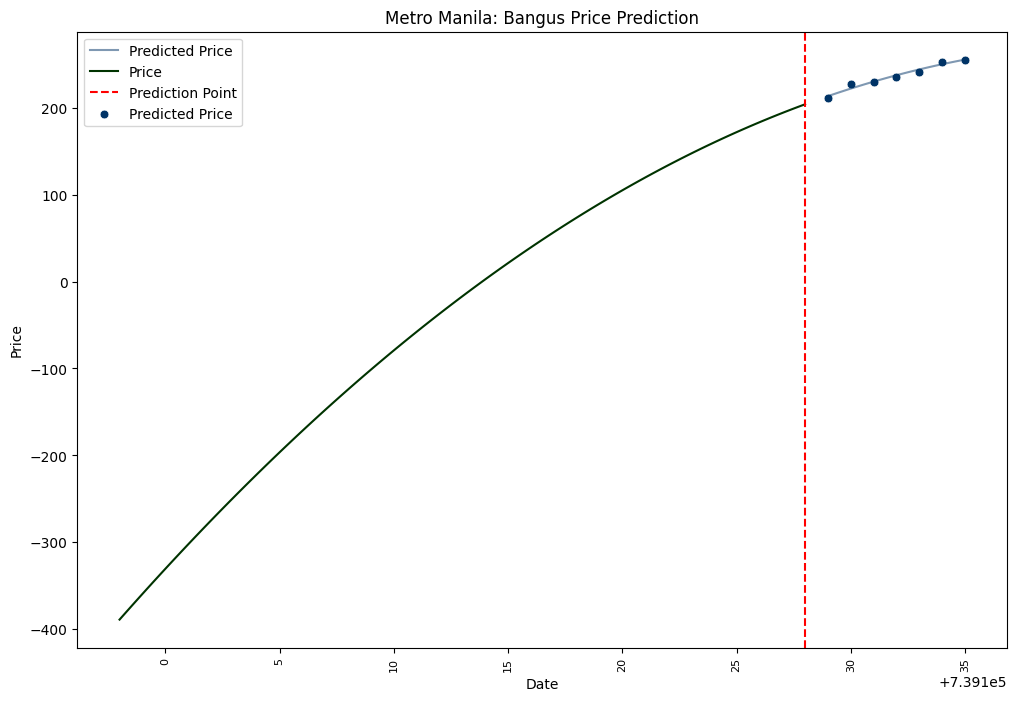

In [34]:
# Set the figure size of the plot
fig, ax = plt.subplots(figsize=(12,8))

# PREDICT_14
# Fit a polynomial curve of degree 3
coefficients = np.polyfit(predict_14['Date'], predict_14['Prediction'], 3)
poly_model = np.poly1d(coefficients)

# Generate x values for the curve
x_curve = np.linspace(min(predict_14['Date']), max(predict_14['Date']), 100)

# Calculate corresponding y values
y_curve = poly_model(x_curve)

# LAST_14_DAYS
# Fit a polynomial curve of degree 3
coefficients1 = np.polyfit(last_14_days['Date'], last_14_days['High'], 3)
poly_model1 = np.poly1d(coefficients)

# Generate x values for the curve
x_curve1 = np.linspace(min(last_14_days['Date']), max(last_14_days['Date']), 100)

# Calculate corresponding y values
y_curve1 = poly_model(x_curve1)

# Create the Line Plot: Curved
sns.lineplot(x=x_curve, y=y_curve, color='#003366', label='Predicted Price', alpha=0.5)
sns.lineplot(x=x_curve1, y=y_curve1, color='#003300', label='Price')
plt.axvline(last_14_days['Date'][len(last_14_days) - 1], color="red", linestyle='--', label="Prediction Point")

# Create the Line Plot: Straight
# sns.lineplot(data=predict_14, x=predict_14['Date'], y=predict_14['Prediction'], color='#003366', label='Predicted Price', alpha=0.5)
# sns.lineplot(data=last_14_days, x=last_14_days['Date'], y=last_14_days['High'], color='#003300', label='Price')
# plt.axvline(last_14_days['Date'][len(last_14_days) - 1], color="red", linestyle='--', label="Prediction Point")

sns.scatterplot(data=predict_14, x=predict_14['Date'], y=predict_14['Prediction'], color='#003366', label='Predicted Price', s=40)

# plt.scatter(predict_14['Date'] + pd.Timedelta(days=6), predict_14, color='orange', label='Predicted Price')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Metro Manila: Bangus Price Prediction')

# Add a legend
plt.legend()

# Set x-ticks to correspond to Barangay names
plt.xticks(fontsize=8, rotation=90)

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=predict.index, y=predict['High'], label = 'Historical Prices')

plt.axvline(predict.index[-1], color="red", linestyle='--', label="Prediction Point")
plt.scatter(predict.index[-1] + pd.Timedelta(days=1), predicted_price, color='orange', label='Predicted Price')
plt.legend()
plt.show()
print(f'Predicted Price for the next day: {predicted_price}')